# K Means Algorithm from scratch

# Step Involved

Our algorithm works as follows, assuming we have inputs x_1, x_2, x_3, ..., x_n and value of K

Step 1 - Pick K random points as cluster centers called centroids.

Step 2 - Assign each x_ix to nearest cluster by calculating its distance to each centroid.

Step 3 - Find new cluster center by taking the average of the assigned points.

Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

# Detailed Step

Step 1
We randomly pick K cluster centers(centroids). Let’s assume these are c_1, c_2, ..., c_kc 

and we can say that;

C = {c_1, c_2,..., c_k}C=c 

C is the set of all centroids.

Step 2:

In this step we assign each input value to closest center. This is done by calculating Euclidean(L2) distance between the point and the each centroid.

Step 3:

In this step, we find the new centroid by taking the average of all the points assigned to that cluster.

Step 4
In this step, we repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

# Choosing the Value of K

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point

# Implementation using Python

# Importing the data

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset
data = pd.read_csv('Dataset-Kmeans-xclara.csv', error_bad_lines=False)
print(data.shape)
data.head()

(3000, 3)


C:\Users\arun_\AppData\Local\Temp\ipykernel_13480\3455717779.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Dataset-Kmeans-xclara.csv', error_bad_lines=False)


,V1,V2,Unnamed: 2
0,2.072345,-3.241693,NaN
1,17.936710,15.784810,NaN
2,1.083576,7.319176,NaN
3,11.120670,14.406780,NaN
4,23.711550,2.557729,NaN


In [ ]:
df = pd.read_excel("mitsubishi_data_2col.xlsx")

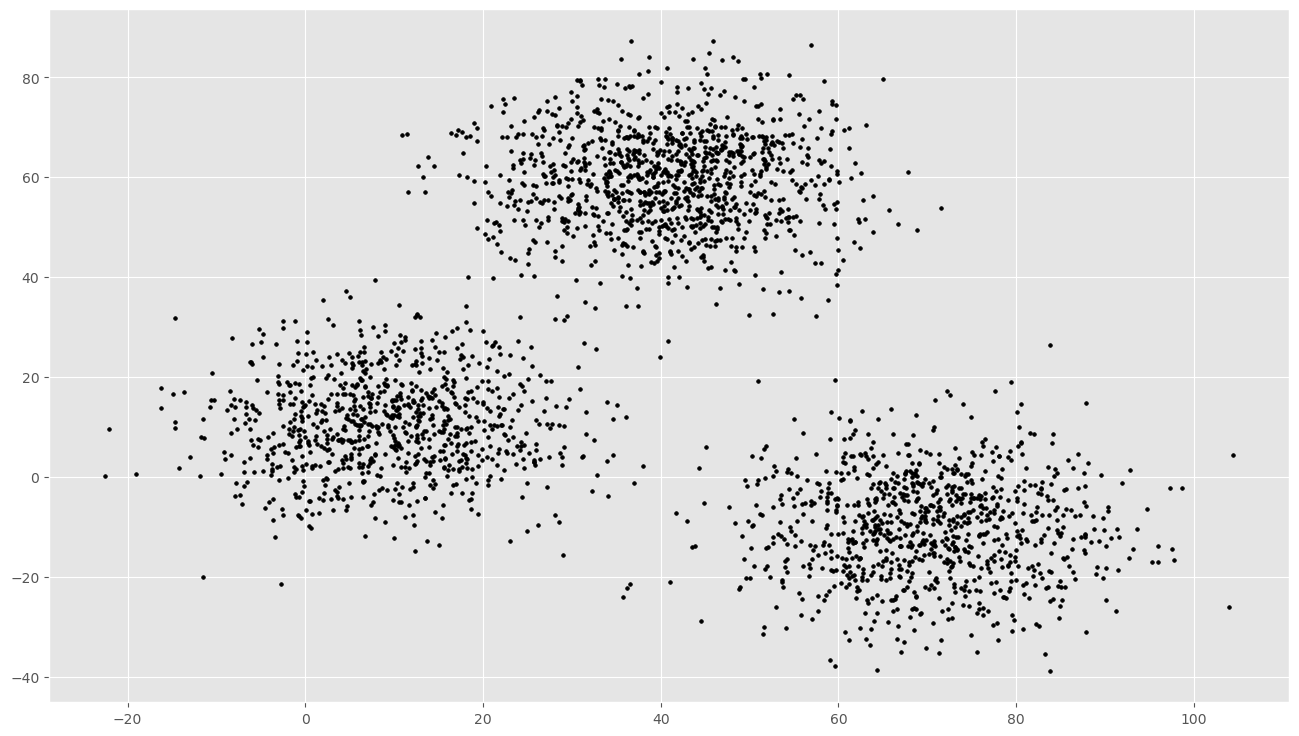

In [2]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [3]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


In [4]:
# Number of clusters
k = 4
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[62. 64.]
 [60. 13.]
 [60.  8.]
 [ 1. 36.]]


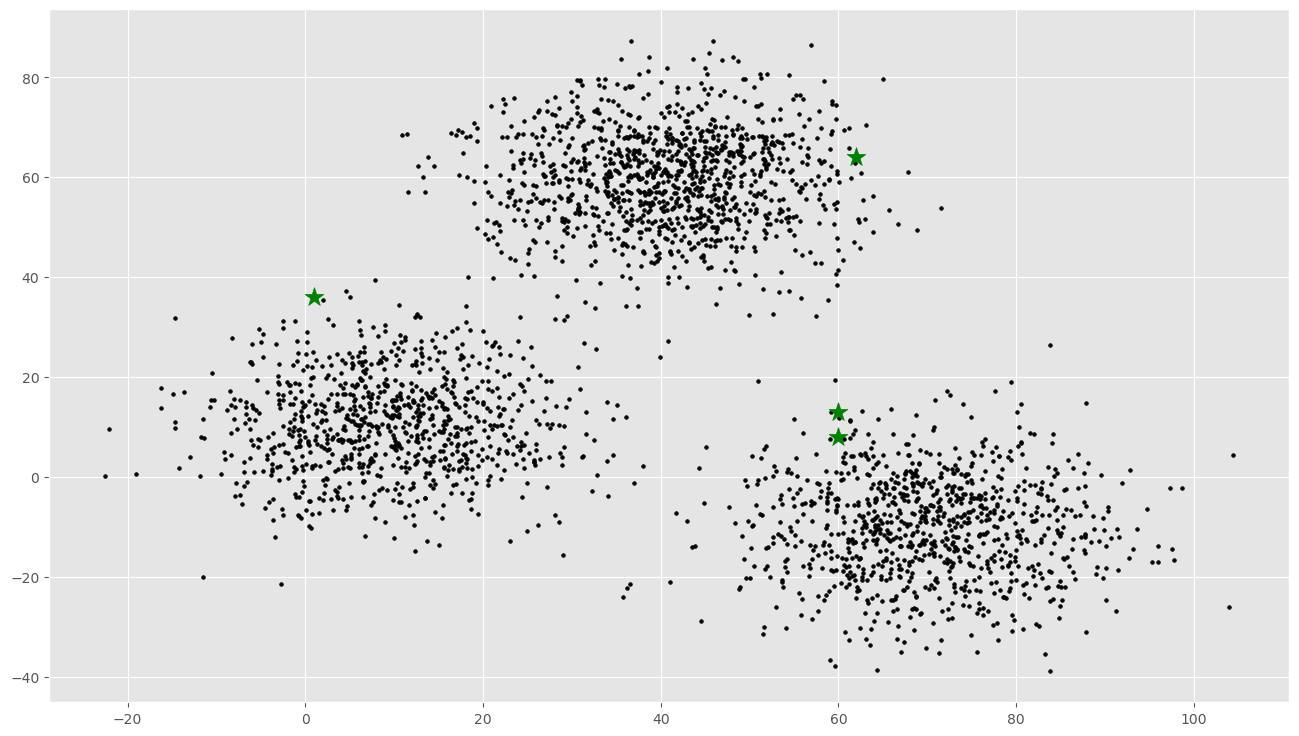

In [5]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

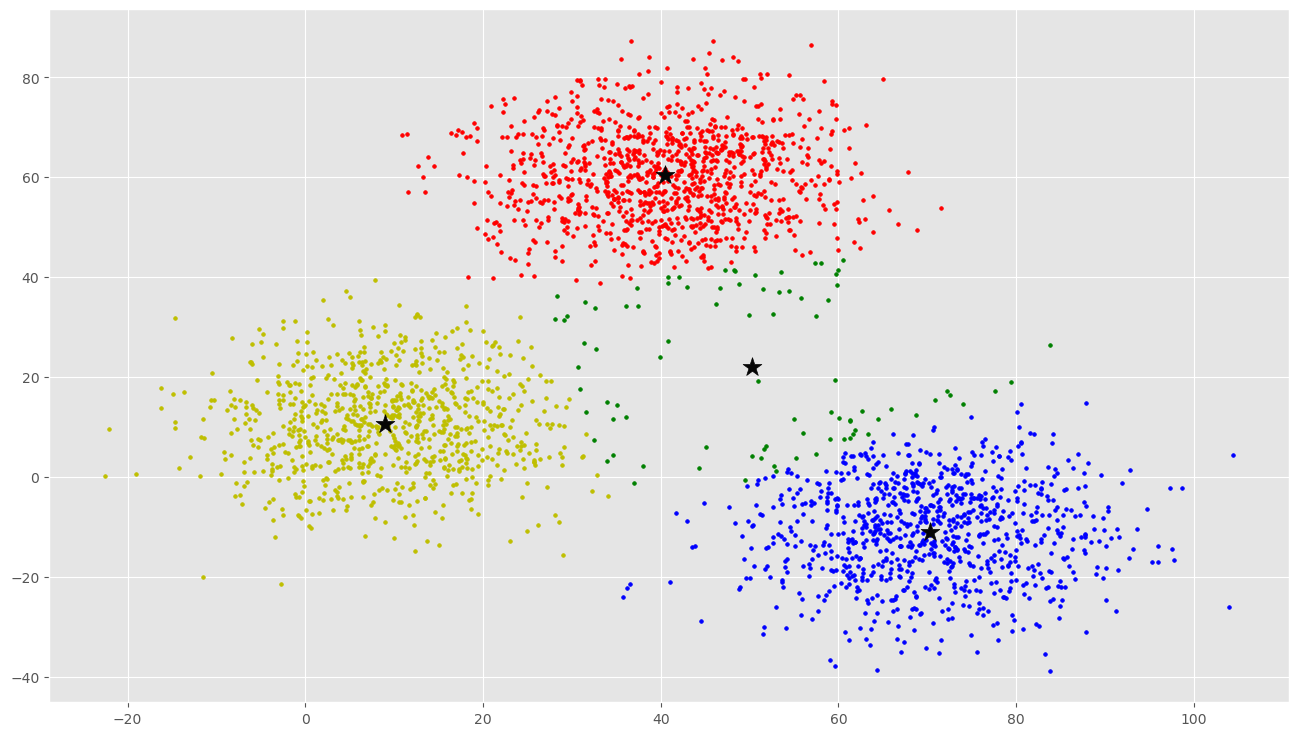

In [6]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

From this visualization it is clear that there are 3 clusters with black stars as their centroid.

If you run K-Means with wrong values of K, you will get completely misleading clusters. For example, if you run K-Means on this with values 2, 4, 5 and 6, you will get the following clusters.

# K-Means using Scikit Learn

In [7]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 40.46229   60.36858 ]
 [ 50.286903  21.93219 ]
 [ 70.28606  -10.924138]
 [  8.991111  10.571509]]
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]
